# 1-1

In [1]:
from __future__ import print_function, division

import nsfg

# Read NSFG data into a Pandas DataFrame.
preg = nsfg.ReadFemPreg()
print(preg.head())
    
# Print the column names.
print(preg.columns)
    
# Select a single column name.
print(preg.columns[1])
    
# Select a column and check what type it is.
pregordr = preg['pregordr']
print(type(pregordr))
    
# Print a column.
print(pregordr)
    
# Select a single element from a column.
print(pregordr[0])
    
# Select a slice from a column.
print(pregordr[4:8])
    
# Select a column using dot notation.
pregordr = preg.pregordr
    
# Count the number of times each value occurs.
print(preg.outcome.value_counts().sort_index())
    
# Check the values of another variable.
print(preg.birthwgt_lb.value_counts().sort_index())
    
# Make a dictionary that maps from each respondent's caseid to a list of indices into the pregnancy DataFrame. Use it to select the pregnancy outcomes for a single respondent.
caseid = 10011
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
print(preg.outcome[indices].values)

   caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0       1         1        NaN        NaN       NaN       NaN       6.0   
1       1         2        NaN        NaN       NaN       NaN       6.0   
2       2         1        NaN        NaN       NaN       NaN       5.0   
3       2         2        NaN        NaN       NaN       NaN       6.0   
4       2         3        NaN        NaN       NaN       NaN       6.0   

   pregend2  nbrnaliv  multbrth  ...  laborfor_i  religion_i  metro_i  \
0       NaN       1.0       NaN  ...           0           0        0   
1       NaN       1.0       NaN  ...           0           0        0   
2       NaN       3.0       5.0  ...           0           0        0   
3       NaN       1.0       NaN  ...           0           0        0   
4       NaN       1.0       NaN  ...           0           0        0   

       basewgt  adj_mod_basewgt      finalwgt  secu_p  sest  cmintvw  \
0  3410.389399      3869.349602   6448

## Exercises

In [2]:
# Select the `birthord` column, print the value counts, and compare to results published in the [codebook].
print(preg.birthord.value_counts().sort_index())
# Comparing the output we see that the values are the same as the codebook.
    
# We can also use `isnull` to count the number of nans.
print(preg.birthord.isnull().sum())
    
# Select the prglngth column, print the value counts, and compare to results published in the codebook.
print(preg.prglngth.value_counts().sort_index())
# I tried to get my output to look exactly like the codebook, with 3 bins, but the bin size went below zero. Regardless the overall values are the same.
    
# To compute the mean of a column, you can invoke the mean method on a Series. For example, here is the mean birthweight in pounds:
print(preg.totalwgt_lb.mean())
    
# Create a new column named totalwgt_kg that contains birth weight in kilograms. Compute its mean. Remember that when you create a new column, you have to use dictionary syntax, not dot notation.
preg['totalwgt_kg'] = preg.totalwgt_lb / 2.2046
print(preg.totalwgt_kg.mean())
    
# nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:
resp = nsfg.ReadFemResp()
    
# DataFrame provides a method head that displays the first five rows:
print(resp.head())
    
# Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?
print(resp.age_r.value_counts().sort_index())
# The youngest respondents are 15 and the oldest are 44.
    
# We can use the caseid to match up rows from resp and preg. For example, we can select the row from resp for caseid 2298 like this:
print(resp[resp.caseid==2298])

# And we can get the corresponding rows from preg like this:
print(preg[preg.caseid==2298])

# How old is the respondent with caseid 1?
print(resp[resp.caseid==1].age_r)
# The respondent is 44.

# What are the pregnancy lengths for the respondent with caseid 2298?
preg[preg.caseid==2298].prglngth
# The pregnacy lengths are 40, 36, 30 and 40 for this respondent.

# What was the birthweight of the first baby born to the respondent with caseid 5012?
print(preg[preg.caseid==5012].birthwgt_lb)
print(preg[preg.caseid==5012].totalwgt_kg)
# The birthweight was 6 lbs. or 2.7216 kg.

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64
4445
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64
7.265628457623368
3.29566744879946
   caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   
1    5012        1         5         1            5          5.0     42 

# 1-2

In [3]:
from __future__ import print_function, division

import numpy as np
import sys

import nsfg
import thinkstats2

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df

def CleanFemResp(df):
    pass

def ValidatePregnum(resp):
    preg = nsfg.ReadFemPreg()

    preg_map = nsfg.MakePregMap(preg)
    
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False
        elif len(indices) == pregnum:
            print(caseid, len(indices), pregnum)

    return True

def main(script):
    resp = ReadFemResp()
    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)
    assert(ValidatePregnum(resp))

    print('All tests passed.')
    
if __name__ == '__main__':
    main(sys.argv)

2298 4 4
5012 1 1
11586 1 1
6794 0 0
616 0 0
845 8 8
10333 0 0
855 0 0
8656 3 3
3566 0 0
5917 2 2
9200 1 1
6320 2 2
11700 2 2
7354 7 7
3697 0 0
4881 3 3
5862 4 4
8542 2 2
2054 3 3
3719 1 1
11740 5 5
11343 3 3
7075 3 3
5422 2 2
2178 2 2
8358 0 0
5083 2 2
1545 2 2
5656 2 2
9334 4 4
5507 3 3
611 0 0
4260 2 2
11767 3 3
5573 5 5
11901 1 1
8975 1 1
5267 3 3
910 1 1
4463 4 4
8954 1 1
1814 3 3
7011 4 4
4057 2 2
7081 4 4
5499 1 1
6551 5 5
9242 0 0
11408 5 5
7168 3 3
2339 1 1
4138 0 0
8785 1 1
1511 3 3
2240 0 0
8190 0 0
5278 1 1
469 0 0
5351 5 5
10633 1 1
11058 2 2
3329 0 0
3814 2 2
4966 2 2
4327 2 2
6908 1 1
9302 4 4
4627 0 0
8085 1 1
9555 3 3
1821 2 2
319 4 4
10295 1 1
8269 3 3
4693 0 0
6370 1 1
8628 4 4
2171 7 7
581 4 4
8065 2 2
8081 3 3
2286 0 0
7758 2 2
2401 2 2
4795 1 1
6145 2 2
10463 0 0
547 0 0
2522 0 0
997 2 2
1786 0 0
4308 5 5
3800 0 0
7599 0 0
9866 0 0
5338 0 0
10289 0 0
2281 0 0
4150 3 3
3679 0 0
1810 3 3
7369 0 0
5243 2 2
1014 1 1
5455 1 1
8417 0 0
5296 0 0
7483 2 2
6397 7 7
7430 0 

10746 0 0
701 5 5
10078 3 3
590 2 2
4522 0 0
4446 2 2
9865 0 0
10120 3 3
10791 0 0
4644 0 0
5581 1 1
1134 3 3
7554 2 2
12464 2 2
7413 1 1
5347 0 0
8728 4 4
8562 0 0
5672 0 0
256 3 3
32 0 0
3034 0 0
4984 2 2
2769 1 1
11991 2 2
3037 1 1
8018 6 6
1211 6 6
6645 2 2
4436 0 0
4961 0 0
9472 2 2
1709 5 5
11398 4 4
11327 0 0
4655 3 3
6270 3 3
1145 2 2
2560 2 2
11047 1 1
7286 0 0
3530 0 0
1419 0 0
2133 3 3
8365 0 0
6530 0 0
508 1 1
5791 1 1
614 0 0
5890 1 1
10533 0 0
7198 0 0
11214 0 0
40 0 0
956 0 0
1101 6 6
8867 7 7
2595 0 0
6748 3 3
4051 0 0
2031 2 2
502 0 0
5893 1 1
8454 7 7
7807 3 3
11780 0 0
9098 0 0
10985 0 0
1068 3 3
1733 4 4
8126 2 2
1722 4 4
9681 1 1
4630 0 0
7071 0 0
289 0 0
8866 3 3
948 2 2
7932 1 1
11208 0 0
4166 0 0
1314 4 4
11693 1 1
8393 5 5
12481 0 0
2962 0 0
5085 0 0
10466 3 3
4097 4 4
10623 0 0
6951 4 4
2307 4 4
1165 2 2
10088 2 2
760 5 5
2202 1 1
11142 4 4
178 0 0
6045 0 0
4805 7 7
992 2 2
8049 1 1
1694 3 3
10824 3 3
8913 2 2
6556 0 0
10265 0 0
1505 0 0
10319 0 0
12484 0 0
90

2158 2 2
2775 2 2
81 1 1
11323 0 0
8418 3 3
6192 2 2
11260 0 0
11383 4 4
574 7 7
3997 1 1
9878 2 2
12516 0 0
3474 3 3
5373 0 0
7540 2 2
12327 1 1
10491 1 1
2030 3 3
9693 0 0
12006 0 0
10011 0 0
4454 1 1
1244 4 4
1461 0 0
2001 0 0
600 1 1
4209 4 4
7145 0 0
1159 1 1
9571 1 1
10834 3 3
6432 0 0
7061 0 0
11232 0 0
10500 0 0
1552 0 0
5912 1 1
8722 5 5
1996 0 0
4218 0 0
7713 1 1
9657 1 1
750 2 2
2753 3 3
8968 0 0
5504 2 2
8220 0 0
10780 1 1
82 0 0
9469 0 0
11145 4 4
2043 0 0
3119 0 0
10767 1 1
11648 0 0
11792 1 1
1550 0 0
6198 0 0
8425 0 0
1026 2 2
8488 2 2
1142 0 0
1345 1 1
4441 3 3
2790 1 1
6922 4 4
9112 0 0
3032 0 0
900 1 1
6282 1 1
1133 0 0
10733 0 0
11705 0 0
4111 0 0
3334 4 4
1815 0 0
1193 0 0
11507 0 0
3301 0 0
7500 5 5
8972 1 1
7165 0 0
1297 0 0
8549 2 2
8145 0 0
7632 3 3
5496 2 2
664 2 2
7018 0 0
456 3 3
9339 1 1
2469 1 1
362 4 4
10889 3 3
8322 1 1
11642 2 2
1446 3 3
961 4 4
4066 1 1
7125 2 2
10730 3 3
4919 3 3
2950 2 2
4929 3 3
2428 1 1
990 2 2
10117 4 4
3011 4 4
689 2 2
2071 1 1
3

9881 1 1
4110 5 5
758 4 4
10094 4 4
12488 4 4
2572 0 0
9286 0 0
4590 4 4
2739 0 0
5473 2 2
8598 5 5
2338 5 5
2926 4 4
2098 2 2
6990 3 3
10338 3 3
1251 4 4
1761 8 8
4723 0 0
184 1 1
6522 3 3
11517 2 2
7249 2 2
5309 0 0
8714 3 3
9550 4 4
9382 0 0
4598 2 2
9175 0 0
1431 0 0
210 4 4
2194 3 3
7951 0 0
9148 0 0
1296 4 4
2902 0 0
2103 0 0
6600 0 0
294 3 3
12173 0 0
12485 0 0
10229 7 7
10407 3 3
276 0 0
10286 0 0
756 4 4
12175 3 3
4715 0 0
4702 0 0
2655 3 3
12151 0 0
2912 2 2
7810 3 3
5817 0 0
11077 4 4
6521 0 0
12108 5 5
9342 1 1
5805 0 0
6515 2 2
3121 0 0
9412 0 0
11486 3 3
6478 0 0
1121 3 3
7696 0 0
4601 1 1
12100 0 0
3248 6 6
989 9 9
7417 7 7
8770 0 0
1794 0 0
3022 1 1
3860 2 2
1891 3 3
12352 0 0
12330 2 2
3050 0 0
7367 3 3
10063 2 2
8502 0 0
9366 0 0
8951 1 1
5391 1 1
4163 2 2
11011 0 0
11655 7 7
11307 3 3
3047 7 7
190 5 5
181 2 2
1606 5 5
462 2 2
5980 6 6
5767 5 5
5992 4 4
9114 4 4
6678 5 5
6335 3 3
1542 2 2
8027 2 2
11461 2 2
741 0 0
3252 2 2
12093 0 0
4880 0 0
8895 0 0
11555 0 0
9070 1

5707 1 1
5923 5 5
7396 0 0
10093 0 0
12172 2 2
8845 2 2
12358 0 0
3959 3 3
5734 3 3
11786 6 6
6870 0 0
11680 1 1
8709 2 2
1020 0 0
9759 1 1
4254 3 3
10281 0 0
9331 2 2
5412 0 0
3213 1 1
820 4 4
11182 4 4
4310 3 3
8286 0 0
11244 0 0
11633 1 1
5891 1 1
60 2 2
2836 0 0
1247 0 0
8521 0 0
11025 0 0
1840 5 5
5045 0 0
529 0 0
5065 1 1
5970 3 3
4040 0 0
9877 2 2
4850 0 0
1748 2 2
1715 1 1
730 0 0
12467 1 1
186 2 2
3767 0 0
810 1 1
11701 2 2
6155 2 2
5272 14 14
277 3 3
7957 1 1
11623 3 3
3688 0 0
4162 0 0
7733 1 1
629 1 1
8116 2 2
1292 4 4
5466 5 5
4904 4 4
91 7 7
4878 0 0
8601 4 4
5067 3 3
9644 5 5
10701 0 0
3549 0 0
12118 1 1
1008 0 0
1214 9 9
3153 3 3
7460 4 4
2679 4 4
9325 3 3
12305 1 1
3666 3 3
10513 1 1
11139 0 0
3200 2 2
10941 3 3
1010 2 2
3760 0 0
11942 0 0
11820 2 2
9809 6 6
5035 0 0
816 4 4
9101 0 0
1904 1 1
3222 3 3
9754 0 0
6426 3 3
11894 0 0
10183 0 0
1739 2 2
3070 2 2
6113 2 2
3850 2 2
12176 2 2
1564 0 0
1989 0 0
1478 1 1
8811 3 3
4457 3 3
3932 2 2
3818 0 0
11374 0 0
2056 5 5
6314

10004 2 2
6513 1 1
4127 0 0
288 3 3
3568 1 1
4480 4 4
7642 2 2
2835 0 0
8105 3 3
10929 1 1
3885 2 2
11304 0 0
3157 2 2
4360 0 0
4469 1 1
8506 1 1
2500 1 1
1401 2 2
3616 0 0
3395 0 0
8944 3 3
9109 1 1
9436 3 3
6117 2 2
2806 3 3
5311 2 2
7029 1 1
3645 1 1
3694 3 3
641 0 0
7660 3 3
7079 0 0
11110 3 3
1090 1 1
2215 1 1
8636 2 2
9988 6 6
10416 1 1
3710 2 2
348 3 3
2318 3 3
8263 0 0
12241 3 3
12478 1 1
591 1 1
9923 4 4
10291 1 1
6712 4 4
2839 1 1
2860 0 0
6552 2 2
1326 0 0
9231 0 0
4977 0 0
12416 1 1
962 0 0
11593 1 1
7705 1 1
8552 1 1
767 0 0
10268 4 4
10670 4 4
3745 3 3
8229 2 2
7669 1 1
2869 0 0
556 1 1
8633 0 0
11860 0 0
9440 2 2
1649 3 3
2989 3 3
1164 2 2
2290 0 0
695 3 3
8575 6 6
7891 2 2
7337 1 1
1217 2 2
3325 1 1
1521 0 0
5564 1 1
5978 0 0
2433 4 4
10408 2 2
5066 3 3
8857 1 1
11460 1 1
7487 2 2
7912 2 2
52 1 1
2908 4 4
3843 3 3
6214 1 1
831 0 0
2817 3 3
11503 2 2
12518 1 1
4222 0 0
7639 2 2
4042 3 3
4078 3 3
11679 2 2
8735 2 2
3150 1 1
7056 4 4
7849 2 2
4764 0 0
10379 3 3
1792 0 0
50

2891 1 1
3310 1 1
9235 4 4
4709 0 0
10427 0 0
651 0 0
10917 2 2
1914 1 1
1064 1 1
8278 1 1
11627 1 1
1246 3 3
4247 0 0
4041 1 1
2486 2 2
1609 0 0
4354 1 1
2429 2 2
8344 0 0
11210 2 2
2815 3 3
9560 5 5
10691 0 0
8838 1 1
2616 2 2
7063 0 0
12202 1 1
187 0 0
9419 3 3
4031 3 3
4411 4 4
8932 1 1
6510 1 1
1058 5 5
10666 4 4
2939 0 0
5328 0 0
5804 0 0
1536 2 2
11282 1 1
9007 1 1
7279 0 0
11438 5 5
7702 2 2
10704 7 7
9782 0 0
9338 6 6
7539 2 2
10363 5 5
2125 2 2
8101 2 2
12007 8 8
8869 2 2
8267 0 0
1831 2 2
737 3 3
10970 2 2
8872 3 3
12562 0 0
575 0 0
8551 0 0
687 1 1
6893 0 0
4839 0 0
8788 0 0
5102 1 1
4388 4 4
8311 2 2
7448 2 2
8693 1 1
2726 0 0
3365 0 0
8523 0 0
5865 0 0
1695 0 0
9531 0 0
7766 0 0
12561 2 2
7261 2 2
1997 2 2
4413 0 0
847 2 2
5335 1 1
11736 3 3
11951 0 0
9845 0 0
824 0 0
1092 4 4
697 1 1
10707 0 0
4646 2 2
1826 0 0
11065 0 0
5584 0 0
6175 0 0
4719 0 0
3764 4 4
2367 2 2
11453 6 6
7947 0 0
6286 0 0
9595 1 1
4860 0 0
9390 2 2
7795 0 0
11451 3 3
5436 3 3
12331 4 4
7990 3 3
11801

6597 1 1
1131 3 3
4788 3 3
7126 1 1
5691 3 3
5520 0 0
12508 1 1
8198 0 0
102 0 0
11581 0 0
5737 3 3
101 2 2
11315 0 0
2681 1 1
4399 4 4
10693 0 0
5302 0 0
10930 3 3
1605 0 0
814 4 4
11712 0 0
11147 1 1
1579 1 1
3204 0 0
1126 0 0
3137 0 0
9357 6 6
5397 0 0
805 4 4
1916 3 3
9997 1 1
5964 2 2
3279 2 2
8406 0 0
9740 1 1
8492 0 0
6447 0 0
11054 5 5
7645 4 4
10100 3 3
6768 3 3
6567 0 0
3951 0 0
528 0 0
2946 0 0
11133 2 2
12490 3 3
9907 0 0
9368 1 1
5168 4 4
4553 2 2
9313 0 0
2360 0 0
8766 2 2
5145 1 1
8391 2 2
6121 0 0
6627 2 2
3693 4 4
2949 1 1
9196 0 0
1962 1 1
3005 2 2
9654 0 0
4555 4 4
1596 7 7
2821 0 0
598 0 0
9766 7 7
10135 2 2
5118 3 3
1897 2 2
3554 0 0
11568 1 1
3725 0 0
9622 1 1
19 0 0
12017 0 0
5634 0 0
6839 1 1
5055 0 0
5488 1 1
3889 0 0
3437 2 2
4253 0 0
5273 2 2
1086 6 6
11373 0 0
5646 2 2
7330 1 1
421 1 1
185 0 0
142 4 4
9450 3 3
4940 2 2
3629 2 2
3138 0 0
5286 0 0
6582 5 5
12232 3 3
2508 0 0
6929 3 3
5353 2 2
3055 3 3
7890 0 0
6063 0 0
4809 0 0
9406 3 3
9776 2 2
9023 0 0
702 8

#### I could have run the code without printing the whole dictionary to see all of the number of pregnancies line up with the codebook, but I liked seeing the dictionary output and scrolling through. The visual verification helped me to understand that because everything lined up, all indices and pregnums (how many times each respondent has been pregnant) were equivalent, and therefore I was able to also see the output that all tests have been passed.

# 2-1

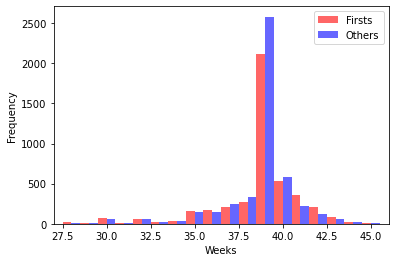

38.60095173351461
38.52291446673706
39
39
0.028879044654449883


<Figure size 576x432 with 0 Axes>

In [4]:
import thinkstats2
import thinkplot
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# Histogram
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)
width = .5
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width, label='Firsts', color='red')
thinkplot.Hist(other_hist, align='left', width=width, label ='Others', color='blue')
thinkplot.Show(xlabel='Weeks', ylabel='Frequency', xlim=[27, 46])

# Means
first_mean = thinkstats2.Mean(firsts.prglngth)
other_mean = thinkstats2.Mean(others.prglngth)
print(first_mean)
print(other_mean)

# Median
first_med = thinkstats2.Median(firsts.prglngth)
other_med = thinkstats2.Median(others.prglngth)
print(first_med)
print(other_med)

#CohenD
cohenD = thinkstats2.CohenEffectSize(firsts.prglngth, others.prglngth)
print(cohenD)

#### Looking at the histogram and the results from a few summary statistic calculations we can see that first born children and the rest of them have around the same mean carrying time. Meaning that for the most part, it doesn't matter if this is the first child or not, the mother SHOULD carry for about 38.5-38.6 (or 39) weeks. That being said, it would be easy to comfort an anxious mother using these statistics, to show her that her first born will probably be born right around 39 weeks.
#### On the other hand, if we look closely at the histogram we can see that after the most common value of 39, first borns (for the most part) have a higher bar. Meaning if there is a baby that is born later than the average it would more likely be the first. This is something I would discuss on the evening news.
#### As Cecil Adams, author of "The Straight Dope", I would explain how while it might be a popular belief, first babies tend to arrive around the same time as every baby born after. There is only a slight difference in their mean arrival times. The only other piece of information I would offer is that on the chance a baby is arriving late, it has higher odds of being the first baby.

# 2-4

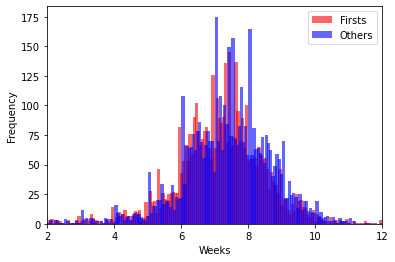

7.201094430437772
7.325855614973262
7.3125
7.375
-0.088672927072602


<Figure size 576x432 with 0 Axes>

In [5]:
# First borns lighter or heavier?

# Histogram
wgtfirst_hist = thinkstats2.Hist(firsts.totalwgt_lb)
wgtother_hist = thinkstats2.Hist(others.totalwgt_lb)
width = .1
thinkplot.PrePlot(2)
thinkplot.Hist(wgtfirst_hist, align='right', width=width, label='Firsts', color='red')
thinkplot.Hist(wgtother_hist, align='left', width=width, label ='Others', color='blue')
thinkplot.Show(xlabel='Weeks', ylabel='Frequency', xlim=[2,12])

# Means
wgtfirst_mean = thinkstats2.Mean(firsts.totalwgt_lb)
wgtother_mean = thinkstats2.Mean(others.totalwgt_lb)
print(wgtfirst_mean)
print(wgtother_mean)

# Median
wgtfirst_med = thinkstats2.Median(firsts.totalwgt_lb)
wgtother_med = thinkstats2.Median(others.totalwgt_lb)
print(wgtfirst_med)
print(wgtother_med)

cohenD2 = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
print(cohenD2)

#### Typically it seems as though first babies tend to be slightly lighter weight than other babies. In this example, using Cohen's D we can see that the difference in means is .08 standard deviations. This compares to the length of pregnancy in a minimal way because in terms of length of pregnancy there was hardly a difference. If we do take small differences into consideration it appears as though babies carried longer were born lighter. This can make a little bit of sense because the baby may have needed longer to grow more and still didn't reach the average weight of babies born in a shorter amount of time.